In [1]:
import nbsetup

import numpy as np

from simulations.ideal_gas.models import IsolatedBox
from helpers.entropy import ErgodicEnsemble

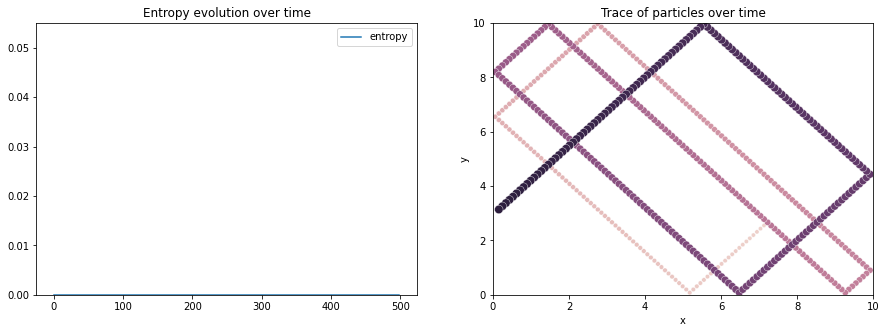

In [2]:
single = IsolatedBox(1)
single.simulate(500)
single.plot()

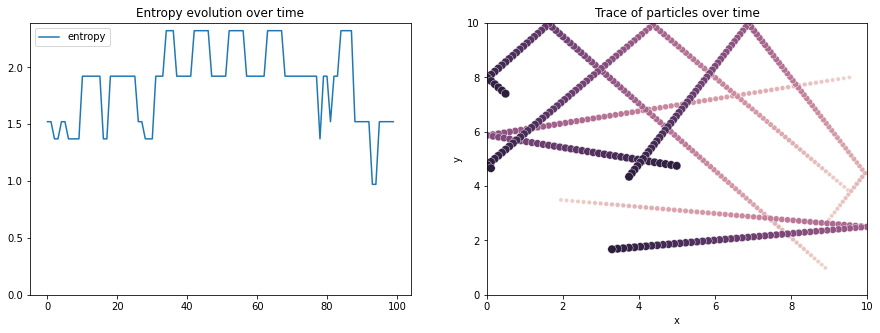

In [4]:
group = IsolatedBox(5)
group.simulate(100)
group.plot()

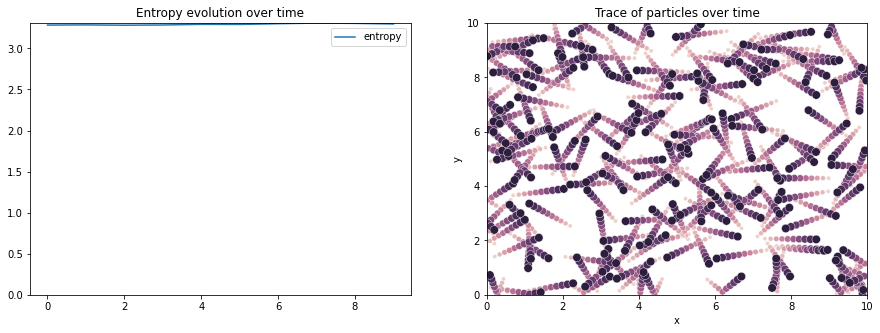

In [5]:
many = IsolatedBox(200)
many.simulate(10)
many.plot()

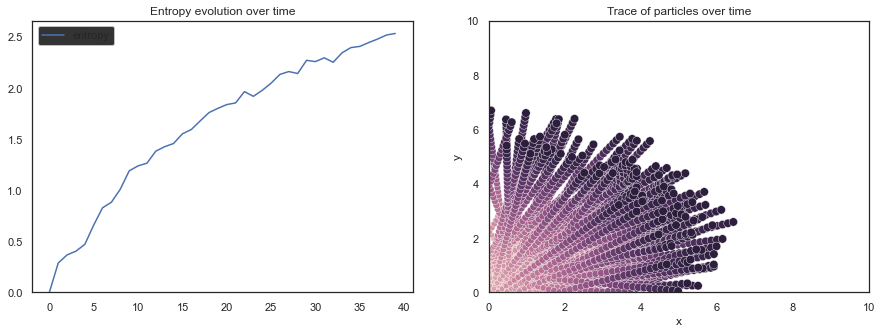

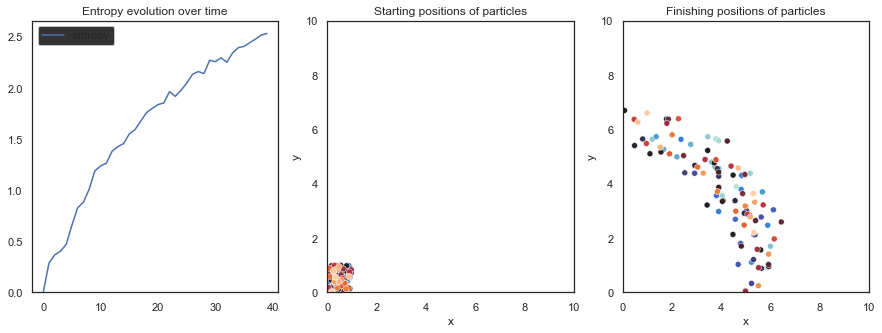

In [41]:
skewed = IsolatedBox(100, skew=0.1)
skewed.simulate(40)
skewed.plot()
skewed.plot(False)

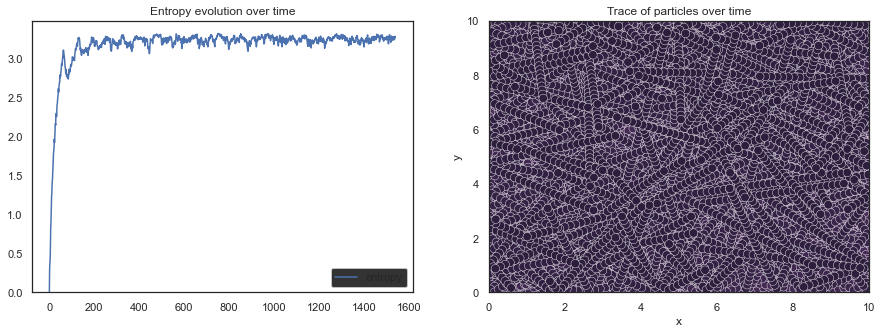

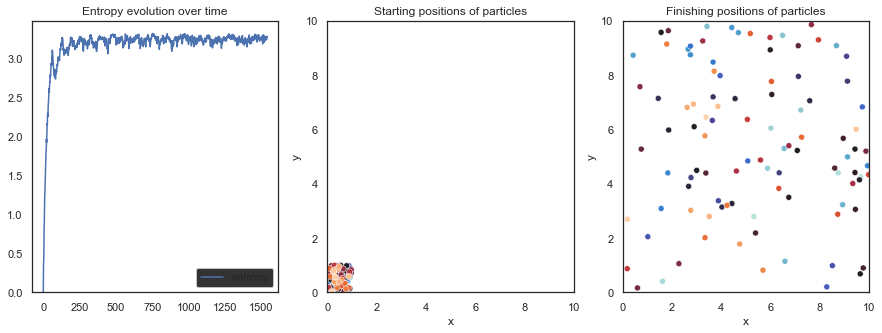

In [44]:
skewed.simulate(1000)
skewed.plot()
skewed.plot(False)

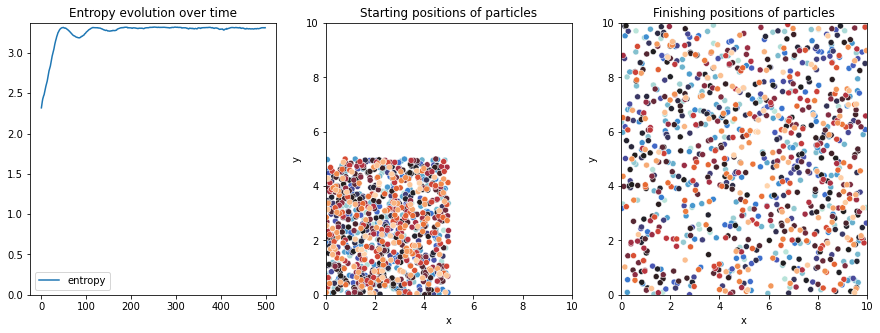

In [8]:
bolder = IsolatedBox(1000, skew=0.5)
bolder.simulate(500)
bolder.plot(False)

Ensembles count: 10
Ergodic entropy: 3.218
Average ensemble entropy: 1.802
Ergodic Complexity: 1.416



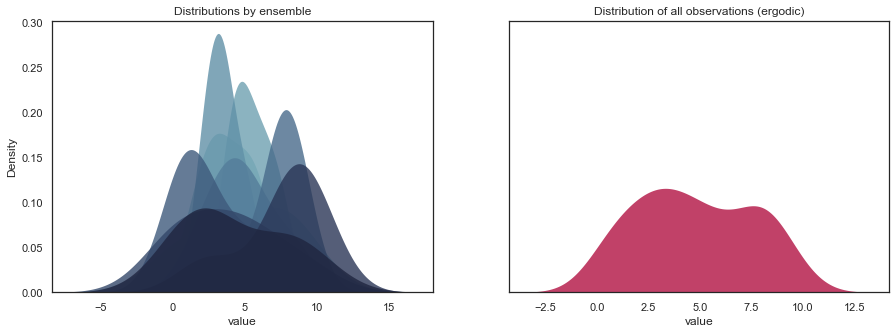

In [69]:
def ergodic(N, steps, ensembles):
    obs = []
    for i in range(ensembles):
        m = IsolatedBox(N, temperature=1.0)
        m.simulate(steps)
        o = np.array(m.datacollector.get_agent_vars_dataframe().loc[m.schedule.steps-1, 'x'])
        obs.append(o)
    obs = np.array(obs)
    bins = np.arange(obs.max()+2)
    return ErgodicEnsemble(obs, bins)

ee = ergodic(5, 100, 10)
ee.stats()
ee.plot()

In [115]:
data = []
for particles in range(5, 1000, 5):
    ee = ergodic(particles, 100, 3)
    data.append({
        'ergodic': ee.ergodic,
        'ensemble': ee.ensemble,
        'particles': particles,
    })
df = pd.DataFrame(data)

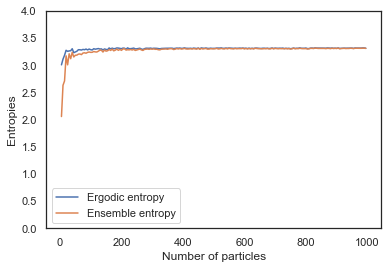

In [117]:
import seaborn as sns
import pandas as pd

sns.lineplot(data=df, x='particles', y='ergodic')
plot = sns.lineplot(data=df, x='particles', y='ensemble')
plot.set_xlabel("Number of particles")
plot.set_ylabel("Entropies")
plot.set_ylim(bottom=0, top=4)
plot.legend(labels=['Ergodic entropy','Ensemble entropy'], facecolor='white')

In [7]:
isinstance(np.array([]), list, np.array)

TypeError: isinstance expected 2 arguments, got 3